### **Classificação de sentimento com TfidfVectorizer e CountVectorizer**

OI! Eu sou a Laiane.

![Python](https://th.bing.com/th/id/OIP.Q_jJE1KDCp7y8KSEhRMl3wHaHa?w=171&h=180&c=7&r=0&o=5&pid=1.7)

##### **INTRODUÇÂO**:

Este notebook contém o projeto desenvolvido como parte de uma case para um processo seletivo na CORTEX, focado na classificação de sentimentos em textos. Aqui, exploramos técnicas de processamento de linguagem natural (NLP) para analisar e categorizar sentimentos expressos em dados textuais. O objetivo é aplicar modelos de aprendizado de máquina para automatizar a identificação de emoções como positivas, negativas ou neutras em diferentes contextos de texto. Este documento fornece uma visão geral do problema, das abordagens utilizadas, das instruções para reproduzir os resultados e das considerações sobre o desenvolvimento e melhorias futuras do modelo.


**ETAPAS:**

- Pré-processamento de texto: Limpeza de texto, tokenização, remoção de stopwords.
- Extração de features: Utilização de técnicas como fidfVectorizer e CountVectorizer.
- Modelos de Machine Learning: Implementação de modelos como RandomForestClassifier, MultinomialNB e LogisticRegression.

- Avaliação de desempenho: Métricas como precisão, recall, F1-score e matriz de confusão.

- Interface de usuário: Exemplo de aplicação simples para demonstração.

**PROBLEMÁTICA:**

*Uma empresa do ramo de telefonia está interessada em monitorar sua reputação nas mídias,
analisando publicações de notícias (online e impressas) relacionadas à sua marca. Para isso, ela
contrata a Cortex para realizar o monitoramento de notícias que mencionam a empresa de forma
positiva e negativa. Devido ao alto volume diário dessas publicações, não é viável para o time ler e
classificar manualmente cada notícia. Para auxiliar nesse processo, é necessário o desenvolvimento
de um modelo de machine learning que seja capaz de identificar qual o sentimento presente em cada
notícia. Sua tarefa é desenvolver esse modelo de classificação de sentimento de notícias (Positivo e
Negativo) que ajude a eficiência da operação do time e que consiga entregar o resultado esperado
pelo cliente, para que ele tenha a percepção de como sua marca está sendo falada nos meios de
comunicação.
A base fornecida das notícias do cliente contém: Título, Conteúdo e Sentimento (Gabarito).*

## 1- IMPORTAÇÃO DOS DADOS

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  #IMPORTANDO SPLIT DE TREINO E TESTE
from simpletransformers.classification import ClassificationModel

from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.model_selection import train_test_split  #IMPORTANDO SPLIT DE TREINO E TESTE

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [90]:

df = pd.read_excel('D:\Programação\CASE\dados_case_ds.xlsx')
df.head()

,Sentimento,Título,Conteúdo
0,Positivo,"Dono da Cyrela gaúcha pede doação, gasta com a...",A tragédia decorrente dos temporais no Rio Gra...
1,Positivo,Operadoras de telefonia reforçam sinal de inte...,"A previsão de 1,5 milhão de pessoas na Praia d..."
2,Positivo,Chuvas no RS: uso de internet cai pela metade ...,Chuvas no RS: uso de internet cai pela metade ...
3,Positivo,Vagas,Vagas \n\n» 0 Grupo IMG (International Meai Co...
4,Positivo,Operadoras dão gigabytes extras para quem cont...,Operadoras dão gigabytes extras para quem cont...


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193 entries, 0 to 5192
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentimento  5186 non-null   object
 1   Título      5186 non-null   object
 2   Conteúdo    5186 non-null   object
dtypes: object(3)
memory usage: 121.8+ KB


## 2- Análise exploratória dos dados (EDA):
- distribuição dos dados, 
- mapeamento das classes para valores numéricos,
- verificar a presença de valores ausentes.



##### 2.1 - Distribuição dos Dados:

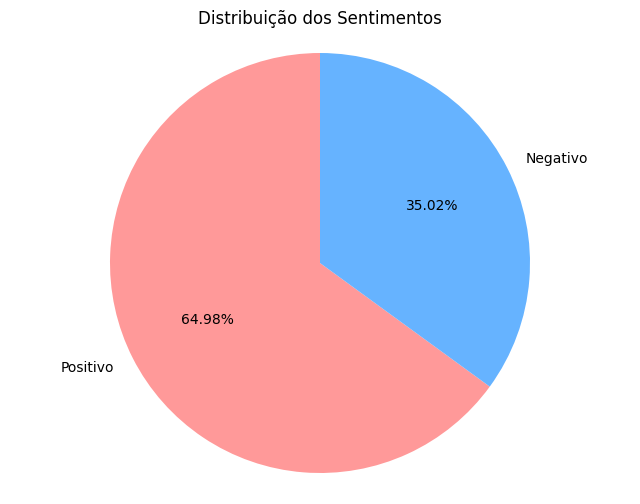

In [92]:



# Supondo que 'df' seja o seu DataFrame e 'Sentimento' a coluna com os dados desejados

# Contagem dos valores
contagem_sentimentos = df['Sentimento'].value_counts()

# Preparando cores personalizadas para o gráfico
cores = ['#FF9999', '#66B3FF', '#99FF99']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(contagem_sentimentos, labels=contagem_sentimentos.index, colors=cores, autopct='%.2f%%', startangle=90)
plt.title('Distribuição dos Sentimentos')
plt.axis('equal')  # Assegura que o gráfico de pizza é desenhado como um círculo
plt.show()


#### *OBS: Percebe-se que o dadaset está desbalenciados. 64.98 % corresponde a classe positiva e 35.02 corresponde a classe negativa*



#### 2.2 - Mapeamento das classes para valores numéricos

In [93]:
df["sentiment_int"] = df["Sentimento"].map({"Positivo": 1, "Negativo": 0})

#### 2.3 - Verificar a presença de valores ausentes e duplicados.


In [94]:
df.isnull().sum()

Sentimento       7
Título           7
Conteúdo         7
sentiment_int    7
dtype: int64

In [95]:
# removendo linhas nulas / valores nulos
df.dropna(inplace=True)

In [96]:
df.isnull().sum()

Sentimento       0
Título           0
Conteúdo         0
sentiment_int    0
dtype: int64

In [97]:
# VERIFICANDO SE HÁ LINHAS DUPLICADAS
df["is_duplicate"] = df.duplicated()
df[df["is_duplicate"]==True].count() 

Sentimento       466
Título           466
Conteúdo         466
sentiment_int    466
is_duplicate     466
dtype: int64

In [98]:
df.drop_duplicates(keep=False, inplace=True, ignore_index=True)
df.drop("is_duplicate", axis=1, inplace=True) 
print("Número de exemplos depois de tiramos as duplicatas: {} \n".format(df.shape[0]))

Número de exemplos depois de tiramos as duplicatas: 4835 



In [99]:
df.Sentimento.value_counts()

Sentimento
Positivo    3168
Negativo    1667
Name: count, dtype: int64

## 3- Processamento do texto:
 - Remoção de url, números, pontuação, caractéres especiais e etc...
 - Lematização da palavra

In [100]:
import nltk #  Biblioteca de processamento de linguagem natural
import re # Biblioteca de expressões regulares para manipulação de strings.

stop_words = nltk.corpus.stopwords.words('portuguese') 
# usando as funções stopword e remover os caracteres indesejados
def remove(linha):
    linha = re.sub(r"http\S+", "", linha).lower() # remove url e tranforma o texto em minusculo
    linha = re.sub(r'[0-9]+', '', linha) # remove números
    linha = re.sub(r'[^\w\s]','', linha) # remove pontuação
    linha = re.sub('[!#$%^&*()]', '', linha) #remove caractéres espaciais
    palavras = [i for i in linha.split() if not i in stop_words]
    return (" ".join(palavras))

# aplicando a função de limpeza de dados:
df['texto'] = df['Conteúdo'].apply(remove) 

df.head()

,Sentimento,Título,Conteúdo,sentiment_int,texto
0,Positivo,"Dono da Cyrela gaúcha pede doação, gasta com a...",A tragédia decorrente dos temporais no Rio Gra...,1.0,tragédia decorrente temporais rio grande sul d...
1,Positivo,Operadoras de telefonia reforçam sinal de inte...,"A previsão de 1,5 milhão de pessoas na Praia d...",1.0,previsão milhão pessoas praia copacabana rio l...
2,Positivo,Chuvas no RS: uso de internet cai pela metade ...,Chuvas no RS: uso de internet cai pela metade ...,1.0,chuvas rs uso internet cai metade obstáculos a...
3,Positivo,Vagas,Vagas \n\n» 0 Grupo IMG (International Meai Co...,1.0,vagas grupo img international meai company mai...
4,Positivo,Operadoras dão gigabytes extras para quem cont...,Operadoras dão gigabytes extras para quem cont...,1.0,operadoras dão gigabytes extras contratar plan...


In [101]:
# determinando forma básica (lema) das palavras
import spacy
nlp = spacy.load('pt_core_news_sm')
#Lista de palavras paradas do NLTK : Palavras de parada são aquelas que, devido à sua onipresença, 
# normalmente não são usadas para descrever o tópico principal de um documento. 


def lematização(instancia): # A função lemmatizer aceita um argumento text, que é uma string contendo o texto a ser processado.
  lista = [] # sent é uma lista que armazenará as palavras do texto processado. 
  doc = nlp(instancia) # A variável doc é o resultado do processamento do texto pelo modelo NLP, que transforma a string em um objeto Doc, que é um container para tokens (palavras) processados.
  
  for palavra in doc:
    if palavra.pos_ == "VERB":
      lista.append(palavra.lemma_)
    else:
      lista.append(palavra.orth_)
  return " ".join(lista)

df['texto_lematizado'] = [lematização(i) for i in df['texto']]



In [102]:
df['Sentimento'].value_counts()

Sentimento
Positivo    3168
Negativo    1667
Name: count, dtype: int64

In [103]:
df['sentiment_int'].value_counts()


sentiment_int
1.0    3168
0.0    1667
Name: count, dtype: int64

In [104]:
df['texto_lematizado'].value_counts()

texto_lematizado
boletim divulgar manhã deste sábado defesa civil rio grande sul atualizar número mortos razão enchentes estar ainda pessoas ferir enquanto seguir desaparecir momento municípios afetar fortes temporais atingir estar desde fim abril números mostrar pessoas abrigos desalojar total pessoas afetar boletim contabiliza pessoas resgatar animais resgatado efetivo atuar neste momento estar pessoas contar viaturas aeronaves embarcações guaíba lagoa patos ainda acordo defesa civil Estado h nível rio guaíba capital porto alegre havia baixar metros m nível lagoa patos chegar m tarde sextafeira sendo cotar inundação local m energia elétrica água telefonia acordo ceee equatorial pontos rio grande sul seguir energia elétrica total clientes atender rge sul informar mil pontos energia elétrica total clientes ainda segundo companhia riograndense saneamento corsan pessoas abastecimento água total clientes atender relação telefonia tim informar três municípios gaúchos serviços telefonia int

## 4.1 Vetorização das palavras com TfidfVectorizer: 
É um processo fundamental em processamento de linguagem natural (NLP), converte uma coleção de documentos de texto em uma matriz de contagens de termos (TF) ponderada pelo inverso da frequência do documento (IDF).

                                                         TF-IDF=TF×IDF

- TF (Frequência do Termo): O número de ocorrências de um termo em um documento.
- IDF (Frequência Inversa do Documento): Logaritmo do inverso da frequência de documentos contendo o termo. Isso reduz a importância das palavras muito comuns em todos os documentos (como "o", "é", etc.).

In [105]:
#VETORIZANDO EM TFIDF A COLUNA (TEXT_PT) - UNIGRAMA, BIGRAMA E TRIGRAMA
#OBS: COM STOP WORD (NLTK OU SPACY) A MÉTRICA CAI UM POUCO



vertorizador = TfidfVectorizer(ngram_range=(1,3), # Cria unigramas, bigramas e trigramas.
                    use_idf=True, # Usa o termo inverso da frequência de documentos (IDF).
                    max_df=0.95, # Ignora termos que aparecem em mais de 95% dos documentos.
                    min_df=2)# ignora termos que aparecem em menos de 2 documentos

texto_vertorizado_TFID = vertorizador.fit_transform(df.texto_lematizado)

X_train_, X_test, y_train_, y_test = train_test_split(texto_vertorizado_TFID, df.sentiment_int, test_size=0.20, random_state=42)



#BALENCIAMENTO DE DADOS
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train_, y_train_)




In [109]:



def metricas(predic_, y_test):
    accuracy = accuracy_score(y_test, predic_)
    recall = recall_score(y_test, predic_)
    precision = precision_score(y_test, predic_)
    f1 = f1_score(y_test, predic_)
    


    mat = metrics.confusion_matrix(y_test , predic_)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(mat, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large')




    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


    return (
        f"Acurácia: {accuracy}\n"
        f"Recall: {recall}\n"
        f"Precisão: {precision}\n"
        f"F1 Score: {f1}\n"
       
    )

##### 4.1.1 Modelos utilizados:
- RandomForestClassifier
- MultinomialNB
- LogisticRegression

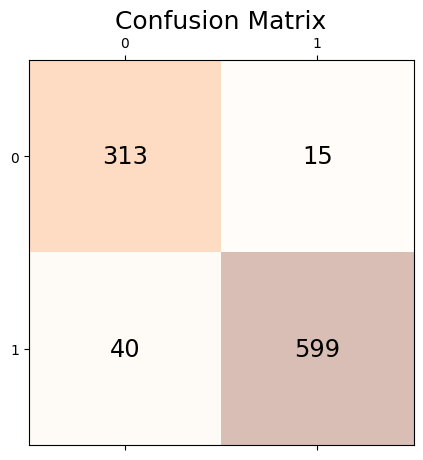

Acurácia: 0.9431230610134437
Recall: 0.9374021909233177
Precisão: 0.9755700325732899
F1 Score: 0.9561053471667997



In [110]:
modeloRF = RandomForestClassifier(random_state = 42)
modeloRF.fit(X_train, y_train)
predic_ = modeloRF.predict(X_test)
metrica = metricas(predic_=predic_, y_test= y_test)
print(metrica)


In [111]:
# Avaliar a acurácia usando validação cruzada com 5 folds
scores = cross_val_score(modeloRF, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácias da Validação Cruzada: {scores}")
print(f"Acurácia Média: {scores.mean()}")


Acurácias da Validação Cruzada: [0.94029851 0.93283582 0.94589552 0.93271028 0.93457944]
Acurácia Média: 0.9372639140744873


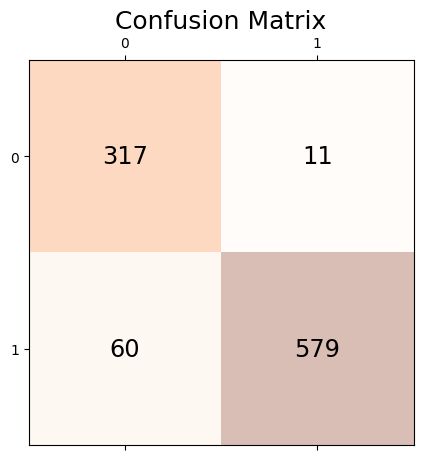

Acurácia: 0.9265770423991727
Recall: 0.9061032863849765
Precisão: 0.9813559322033898
F1 Score: 0.9422294548413345



In [112]:
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
metrica2 = metricas(predic_=pred, y_test= y_test)
print(metrica2)

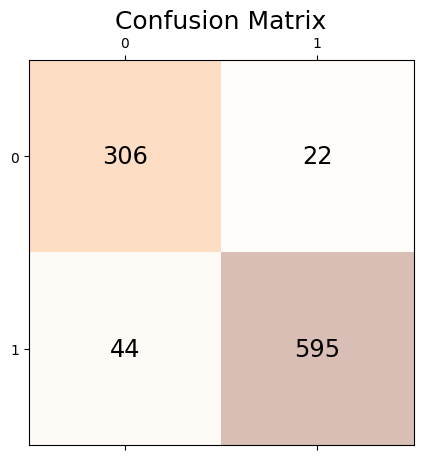

Acurácia: 0.9317476732161324
Recall: 0.9311424100156495
Precisão: 0.9643435980551054
F1 Score: 0.947452229299363



In [113]:

modelLG = LogisticRegression()
modelLG.fit(X_train, y_train)
predic_ = modelLG.predict(X_test)
metrica3 = metricas(predic_=predic_, y_test= y_test)
print(metrica3)

AUC: 0.9797


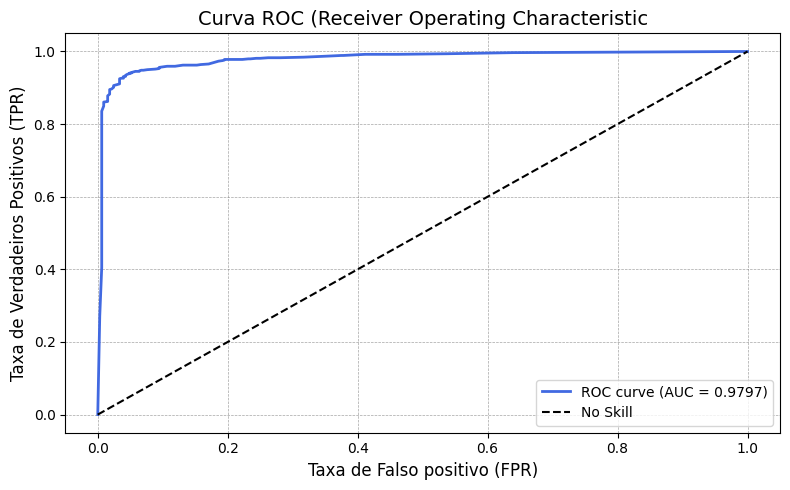

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Predict class probabilities
y_proba = modeloRF.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")  # Format AUC with 4 decimal places

# Plot ROC curve with customizations
plt.figure(figsize=(8, 5))  # Set a more suitable figure size

fpr, tpr, _ = roc_curve(y_test, y_proba)

# Customize plot elements for better readability
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.4f})', color='royalblue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # Add label for reference line
plt.xlabel('Taxa de Falso positivo (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.title('Curva ROC (Receiver Operating Characteristic', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)  # Add subtle grid

# Enhance legend and layout
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()  # Adjust spacing for better visual appeal

plt.show()


## 5.2 Vetorização das palavras com CountVectorizer:
É uma técnica popular de pré-processamento de texto utilizada. Basicamente realiza uma contagem da frequência de cada token (palavra) que ocorre no 
documento.



In [123]:

 # Usar a função simples com CountVectorizer
vectorize_CV = CountVectorizer(ngram_range=(1,1), stop_words=stop_words)

texto_vertorizado_CV = vectorize_CV.fit_transform(df.texto_lematizado)
X_trainCV_, X_test_CV, y_trainCV_, y_test_CV = train_test_split(texto_vertorizado_CV, df.sentiment_int, test_size=0.20, random_state=42)


In [124]:

#BALENCIAMENTO DE DADOS
rus = RandomUnderSampler(random_state=42)
X_trainCV, y_trainCV = rus.fit_resample(X_trainCV_, y_trainCV_)

##### 5.1.2 Modelos utilizados:
- RandomForestClassifier
- MultinomialNB
- LogisticRegression

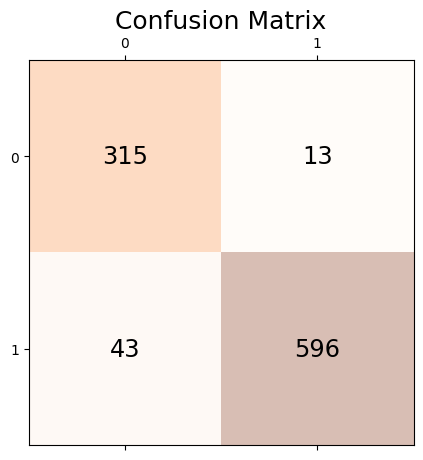

Acurácia: 0.9420889348500517
Recall: 0.9327073552425665
Precisão: 0.9786535303776683
F1 Score: 0.9551282051282052



In [125]:

modeloRF_2 = RandomForestClassifier(random_state = 42)
modeloRF_2.fit(X_trainCV, y_trainCV)
predic_1 = modeloRF_2.predict(X_test_CV)
metrica_CV1 = metricas(predic_=predic_1, y_test= y_test_CV)
print(metrica_CV1)

In [126]:
# cross_val_score 
# Avaliar a acurácia usando validação cruzada com 5 folds
scores_CV= cross_val_score(modeloRF_2, X_trainCV,y_trainCV,cv=5, scoring='accuracy')
print(f"Acurácias da Validação Cruzada: {scores_CV}")
print(f"Acurácia Média: {scores.mean()}")


Acurácias da Validação Cruzada: [0.93843284 0.94402985 0.94776119 0.93831776 0.94018692]
Acurácia Média: 0.9372639140744873


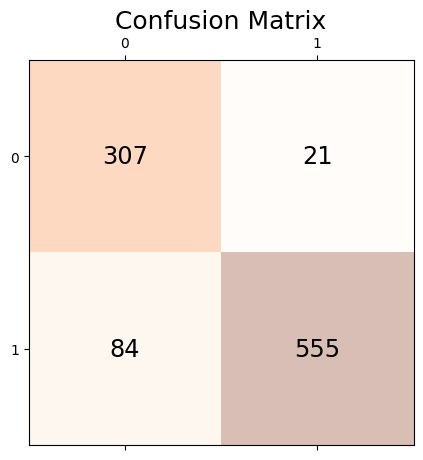

Acurácia: 0.8914167528438469
Recall: 0.8685446009389671
Precisão: 0.9635416666666666
F1 Score: 0.9135802469135802



In [127]:
classifier_CV=MultinomialNB()
classifier_CV.fit(X_trainCV, y_trainCV)
pred_CV3 = classifier_CV.predict(X_test_CV)
metrica_CV2 = metricas(predic_=pred_CV3, y_test= y_test_CV)
print(metrica_CV2)

c:\ProgramData\anaconda3\envs\cienciaDADOS\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


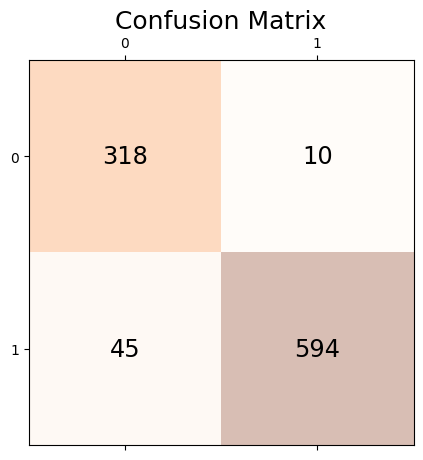

Acurácia: 0.9431230610134437
Recall: 0.9295774647887324
Precisão: 0.9834437086092715
F1 Score: 0.9557522123893806



In [128]:
modelLG_CV = LogisticRegression()
modelLG_CV.fit(X_trainCV, y_trainCV)
predic_CV2 = modelLG_CV.predict(X_test_CV)
metrica_CV3 = metricas(predic_=predic_CV2, y_test= y_test_CV)
print(metrica_CV3)

# 6- RESULTADOS:

![Captura de Tela](https://private-user-images.githubusercontent.com/120536293/340409496-5c6aea81-dfd6-4548-ba6e-e2d1d85e2043.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3MTg2NDgxMTksIm5iZiI6MTcxODY0NzgxOSwicGF0aCI6Ii8xMjA1MzYyOTMvMzQwNDA5NDk2LTVjNmFlYTgxLWRmZDYtNDU0OC1iYTZlLWUyZDFkODVlMjA0My5wbmc_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ3JlZGVudGlhbD1BS0lBVkNPRFlMU0E1M1BRSzRaQSUyRjIwMjQwNjE3JTJGdXMtZWFzdC0xJTJGczMlMkZhd3M0X3JlcXVlc3QmWC1BbXotRGF0ZT0yMDI0MDYxN1QxODEwMTlaJlgtQW16LUV4cGlyZXM9MzAwJlgtQW16LVNpZ25hdHVyZT0wM2Y2ZGRmNjMxYWI3MzNmYzAyYjhjMjJlODYxZTI5NGU1MGZlOTZjM2M4MjhiNjgzYTY3OThmNWNmMDM3MTYwJlgtQW16LVNpZ25lZEhlYWRlcnM9aG9zdCZhY3Rvcl9pZD0wJmtleV9pZD0wJnJlcG9faWQ9MCJ9.YFplxIibFdLNR7l3C3TaMSOQOmgLRXAxEsGIYfD3oGk)


![cap](https://private-user-images.githubusercontent.com/120536293/340409502-00f535aa-72fb-4974-9054-9e9c73b3554e.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3MTg2NDgxMTksIm5iZiI6MTcxODY0NzgxOSwicGF0aCI6Ii8xMjA1MzYyOTMvMzQwNDA5NTAyLTAwZjUzNWFhLTcyZmItNDk3NC05MDU0LTllOWM3M2IzNTU0ZS5wbmc_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ3JlZGVudGlhbD1BS0lBVkNPRFlMU0E1M1BRSzRaQSUyRjIwMjQwNjE3JTJGdXMtZWFzdC0xJTJGczMlMkZhd3M0X3JlcXVlc3QmWC1BbXotRGF0ZT0yMDI0MDYxN1QxODEwMTlaJlgtQW16LUV4cGlyZXM9MzAwJlgtQW16LVNpZ25hdHVyZT0yNDVmM2EzZmQxZGY0ZjU3MDlhMzI3OTExZTc2MjRmZmMyNWFhM2M3MWQwODNjZTIyYWVkNGQ4ZmNkYjlhMjBhJlgtQW16LVNpZ25lZEhlYWRlcnM9aG9zdCZhY3Rvcl9pZD0wJmtleV9pZD0wJnJlcG9faWQ9MCJ9.tpbfuYwHmcTOvUvfAyDmPA9us3iCGpvAjoTsY30J3Jw)


In [135]:
train_accuracy = modeloRF.score(X_train, y_train)
test_accuracy = modeloRF.score(X_test, y_test)
print(f"Acurácia no Treino: {train_accuracy}")
print(f"Acurácia no Teste: {test_accuracy}")


Acurácia no Treino: 0.9996265870052278
Acurácia no Teste: 0.9431230610134437
